<a href="https://colab.research.google.com/github/Trafalgah210/USERNAME/blob/master/portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This program will try to optmise a user portfolio using Efficient Frontier

In [4]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
#Get the stock symbols / tickets in the portfolio
#FATAG
assets = ['FB', 'AMZN', 'TSLA', 'AAPL', 'GOOG']

In [6]:
#Assign weight to the stocks.
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [18]:
#Get stock start date
stockStartDate= '2013-01-01'

In [17]:
#Get the stock ending Date
today = datetime.today().strftime('%Y-%m-%d')

In [22]:
#create dataframe
df = pd.DataFrame()

#store adjsted close price
for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end= today)['Adj Close']

<function matplotlib.pyplot.show>

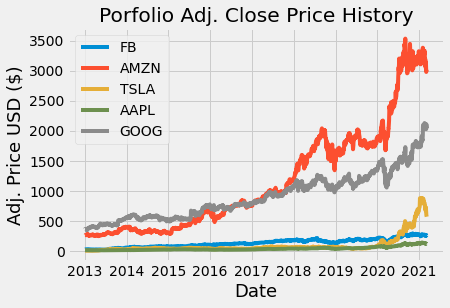

In [24]:
# Visually show the stock

title = 'Porfolio Adj. Close Price History'

#Get the Stocks
my_stocks = df

#create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show

In [25]:
# Show the daily return
returns = df.pct_change()

In [26]:
#Create and Show annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,TSLA,AAPL,GOOG
FB,0.118331,0.055127,0.058428,0.045365,0.050717
AMZN,0.055127,0.093657,0.057268,0.040300,0.047784
TSLA,0.058428,0.057268,0.317183,0.051527,0.047669
AAPL,0.045365,0.040300,0.051527,0.082482,0.038853
GOOG,0.050717,0.047784,0.047669,0.038853,0.067012


In [28]:
#Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06658950187309619

In [33]:
#Calculate the portfolio volatility
port_volatility = np.sqrt(port_variance)

In [34]:
#Calculate annual portfolio return 
porfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
porfolioSimpleAnnualReturn

0.3793053401832989

In [41]:
#Show expected return annual return, volatility ( risk) and variance

percent_var = str( round(port_variance, 4) * 100) + '%'
percent_vols = str(round(port_volatility, 4) * 100) + '%'
percent_ret = str(round(porfolioSimpleAnnualReturn, 4) * 100) + '%'

print(percent_ret)
print(percent_var)
print(percent_vols)

37.93%
6.660000000000001%
25.8%


In [36]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 1.3MB 9.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.11-cp37-cp37m-linux_x86_64.whl size=2725467 sha256=9bb622337a767d592fe59dc9b7f306d27addd6a268979b8df1ad46e9f8dd4ac6
  Stored in directory: /root/.cache/pip/wheels/df/d4/eb/c74e09a39bc4ac09b3a8d2a48c1c6009f391056d8c87bf68aa
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [38]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [40]:
#Pofolio optimization

#Calculate the Expected returns and the annualised sample covariance matrix
mu= expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optmize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.10091), ('AMZN', 0.39981), ('TSLA', 0.3384), ('AAPL', 0.16088), ('GOOG', 0.0)])
Expected annual return: 45.5%
Annual volatility: 30.1%
Sharpe Ratio: 1.44


(0.45539220710635964, 0.3013880405425516, 1.444623370995667)